# One Way ANOVA Activity
## Load in Data and Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [3]:
YoutubeChannels = pd.read_csv('YoutubeChannels_Python.csv')
YoutubeChannels.head()

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,0,SET India,27323,31180559,22675948293
4,5th,0,WWE,36756,32852346,26273668433


# Is there a difference in video views based on grade?
## Data Wrangling

In [4]:
YoutubeChannels1 = YoutubeChannels[['Gr2de', 'Video views']]
YoutubeChannels1.head()

,Gr2de,Video views
0,0,20869786591
1,0,47548839843
2,0,9793305082
3,0,22675948293
4,0,26273668433


In [5]:
YoutubeChannels1['Gr2de'].unique()

array([0, 1, 2, 3])

## Testing Assumptions
### Normality

<AxesSubplot:>

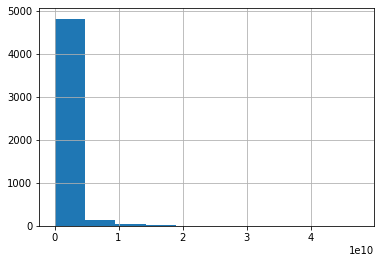

In [6]:
YoutubeChannels1['Video views'].hist()

#### Looks like our data is positively skewed. 
#### Taking the Square Root

In [7]:
YoutubeChannels1['Video viewsSQRT'] = np.sqrt(YoutubeChannels1['Video views'])
YoutubeChannels1.head()

/var/folders/gh/vcsn_slj14q0_wh1ppsy70w00000gn/T/ipykernel_53025/4191562277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YoutubeChannels1['Video viewsSQRT'] = np.sqrt(YoutubeChannels1['Video views'])


,Gr2de,Video views,Video viewsSQRT
0,0,20869786591,144463.789896
1,0,47548839843,218056.964674
2,0,9793305082,98961.129147
3,0,22675948293,150585.352186
4,0,26273668433,162091.543373


<AxesSubplot:>

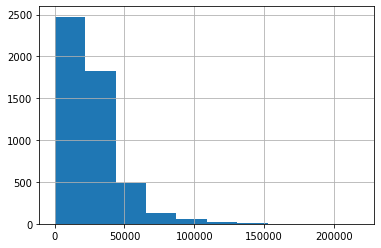

In [8]:
YoutubeChannels1['Video viewsSQRT'].hist()


### Homogeneity of Variance

In [15]:
scipy.stats.bartlett(YoutubeChannels1['Video viewsSQRT'], YoutubeChannels1['Gr2de'])

BartlettResult(statistic=98198.68027836575, pvalue=0.0)

#### Our p-value is significant, which means there is a difference of variance and we do not meet this assumption. We will continue on anyway. 
### Sample Size

In [16]:
YoutubeChannels1.info

<bound method DataFrame.info of       Gr2de  Video views  Video viewsSQRT  Video viewsLOG
0         0  20869786591    144463.789896       23.761568
1         0  47548839843    218056.964674       24.585023
2         0   9793305082     98961.129147       23.004965
3         0  22675948293    150585.352186       23.844571
4         0  26273668433    162091.543373       23.991833
...     ...          ...              ...             ...
4995      3    441202795     21004.827897       19.905015
4996      3    377331722     19425.028237       19.748635
4997      3    311758426     17656.682191       19.557739
4998      3     14563764      3816.249992       16.494047
4999      3     73312511      8562.272537       18.110242

[5000 rows x 4 columns]>

#### We have 5000 rows so we meet this assumption.
### Independence. There is no test for this so it is assumed.
## Running ANOVA

In [20]:
stats.f_oneway(YoutubeChannels1['Video viewsSQRT'][YoutubeChannels1['Gr2de']==0],
                    YoutubeChannels1['Video viewsSQRT'][YoutubeChannels1['Gr2de']==1],
                    YoutubeChannels1['Video viewsSQRT'][YoutubeChannels1['Gr2de']==2],
                    YoutubeChannels1['Video viewsSQRT'][YoutubeChannels1['Gr2de']==3])

F_onewayResult(statistic=565.0043948527235, pvalue=3.4159538e-316)

#### Our p-value is significant, therefore there is a significant difference between video views based on grade. However, because assumptions weren't met, this should be taken with caution.
## Looking at post Hocs

In [21]:
postHoc = MultiComparison(YoutubeChannels1['Video viewsSQRT'],YoutubeChannels1['Gr2de'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj    lower        upper     reject
-----------------------------------------------------------------
     0      1  -68679.9997  -0.0   -83762.851  -53597.1484   True
     0      2 -104953.2517  -0.0 -118510.6738  -91395.8297   True
     0      3 -119688.2398  -0.0 -133234.6321 -106141.8475   True
     1      2   -36273.252  -0.0  -43020.3993  -29526.1048   True
     1      3  -51008.2401  -0.0  -57733.1972   -44283.283   True
     2      3   -14734.988  -0.0  -15974.4784  -13495.4977   True
-----------------------------------------------------------------


#### All of the differences between every option is significant. The biggest difference is between 0 and 3. While I didn't recode the grade variable, I can guess that 0 is probably a++. 3 is a little bit harder to guess, since with the other data there were 5 option and in this data set there were only 4. I would guess that 3 is the lowest grade in the data set. 0 to 3 has the biggest meandiff, showing that the higher the grade had more views, and the lower grades has less view. Resulting in a larger difference. 